In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#Reduce the size of the images to reduce the model size. 128x128 = 812MB
#Rescale the image sizes to between 0 and 1
train_img_datagen = ImageDataGenerator(rescale=1./255)
val_img_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_img_datagen.flow_from_directory(
    '../input/cartrainset',
    target_size=(32,32),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical')

val_set = val_img_datagen.flow_from_directory(
    '../input/cartestset',
    target_size=(32,32),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical')

Found 196 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [4]:
#Reduce the size of the images to reduce the model size. 128x128 = 812MB
#Rescale the image sizes to between 0 and 1
train_img_datagen = ImageDataGenerator(rescale=1./255)
val_img_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_img_datagen.flow_from_directory(
    '../input/cartrainset',
    target_size=(32,32),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical')

val_set = val_img_datagen.flow_from_directory(
    '../input/cartestset',
    target_size=(32,32),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical')

Found 196 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [5]:
class_dict = {'normal': 0,
 'damage': 1}

class_names = list(class_dict.keys())

In [6]:
model = Sequential([
    Conv2D(filters=32, kernel_size=1, input_shape=(32,32,3)),
    Flatten(input_shape=(32, 32)), #flatten --> 3D to 2D
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])

In [7]:
#Use BinaryCrossentropy for classification of 0 and 1
#https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [8]:
model_info = model.fit(train_set,batch_size=32, validation_data= val_set, epochs=8, shuffle=True)

model.summary()

Epoch 1/8
7/7 [==============================] - 4s 459ms/step - loss: 1.6103 - accuracy: 0.5054 - val_loss: 1.0923 - val_accuracy: 0.5238
Epoch 2/8
7/7 [==============================] - 2s 259ms/step - loss: 0.7935 - accuracy: 0.5973 - val_loss: 0.9850 - val_accuracy: 0.4286
Epoch 3/8
7/7 [==============================] - 2s 244ms/step - loss: 0.6385 - accuracy: 0.7197 - val_loss: 0.8267 - val_accuracy: 0.5238
Epoch 4/8
7/7 [==============================] - 2s 259ms/step - loss: 0.4914 - accuracy: 0.7864 - val_loss: 0.9338 - val_accuracy: 0.4762
Epoch 5/8
7/7 [==============================] - 2s 298ms/step - loss: 0.4866 - accuracy: 0.7564 - val_loss: 0.7629 - val_accuracy: 0.5238
Epoch 6/8
7/7 [==============================] - 2s 253ms/step - loss: 0.4458 - accuracy: 0.7905 - val_loss: 0.7389 - val_accuracy: 0.5714
Epoch 7/8
7/7 [==============================] - 2s 236ms/step - loss: 0.3554 - accuracy: 0.8526 - val_loss: 1.0803 - val_accuracy: 0.5238
Epoch 8/8
7/7 [============

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


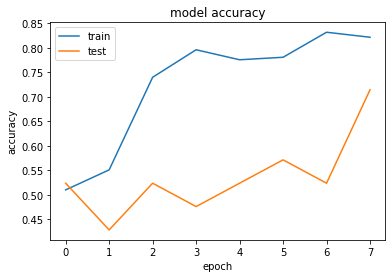

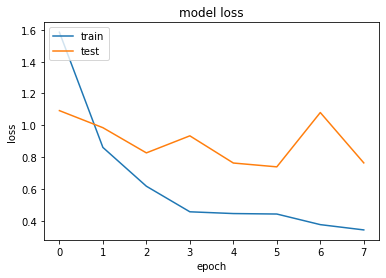

In [9]:
import matplotlib.pyplot as plt

# list all data in history
print(model_info.history.keys())

# summarize history for accuracy
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
model.save('carnormaldamageRGBWorking.h5')

In [11]:
from keras.models import load_model
model = load_model('carnormaldamageRGBWorking.h5')

In [12]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# dimensions of our images
img_width, img_height = 32, 32
images_dir = "../input/cartestset"

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


{'Class': 'damage', 'Probability': 0.6697473}


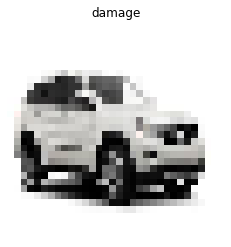

In [13]:
# predicting single image
image_path = "../input/carvalset/W7.jpg"
new_img = image.load_img(image_path, target_size=(img_width, img_height))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

img_class = model.predict_classes(img) #returns ndim np_array
img_class_index = img_class.item() #extracting value(s)
classname = class_names[img_class_index]

img_prob = model.predict_proba(img) #returns numpy array of class probabilities
prediction_prob = img_prob.max()

pred_dict = {"Class":classname, "Probability":prediction_prob}
print(pred_dict)

#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(classname)
plt.show()